# Figure S3

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
from pathlib import Path
import numpy as np
import pandas as pd
import scrublet as scr

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("white")

sc.settings.verbosity=3

In [3]:
import os, sys
sys.path.append(f"{os.getcwd()}/../code")
from plotting.plot_settings import *
from plotting.palettes import *
from plotting.pie import *
from plotting.util import fix_main_adata_annos

## Load data

In [4]:
data_dir = Path(f"{os.getcwd()}/../data")
fig_dir = Path(f"{os.getcwd()}/../figures")

In [5]:
main = sc.read(data_dir / "main.h5ad")
#mye = sc.read(f"{data_dir}/mye.h5ad")
#lym = sc.read(f"{data_dir}/lym.h5ad")
#epi = sc.read(f"{data_dir}/epi.h5ad")
#stro = sc.read(f"{data_dir}/stro.h5ad")
#endo = sc.read(f"{data_dir}/endo.h5ad")
#org = sc.read(f"{data_dir}/org.h5ad")

In [6]:
fix_main_adata_annos(main)

/projects/robson-lab/software/sumner/miniconda3/envs/endometriosis-2021-12/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


## TEMPORARY - Palettes

In [7]:
from matplotlib.colors import hex2color

In [8]:
celltype_color_mapping = {
    "epithelial": "#8da8ea", 
    "stromal": "#e97367", 
    "endothelial": "#828282",
    "myeloid": "#fbb2ba", 
    "lymphocytes": "#9dbf98",
}
celltype_palette = [hex2color(v) for v in celltype_color_mapping.values()]

## Fig S3x

In [9]:
sample_type_key = "sample_type_rename"
patient_key = "PID"
celltype_key = "celltype_main"

In [10]:
props = prep_props(main, ct_key=celltype_key, pt_key=patient_key, st_key=sample_type_key)

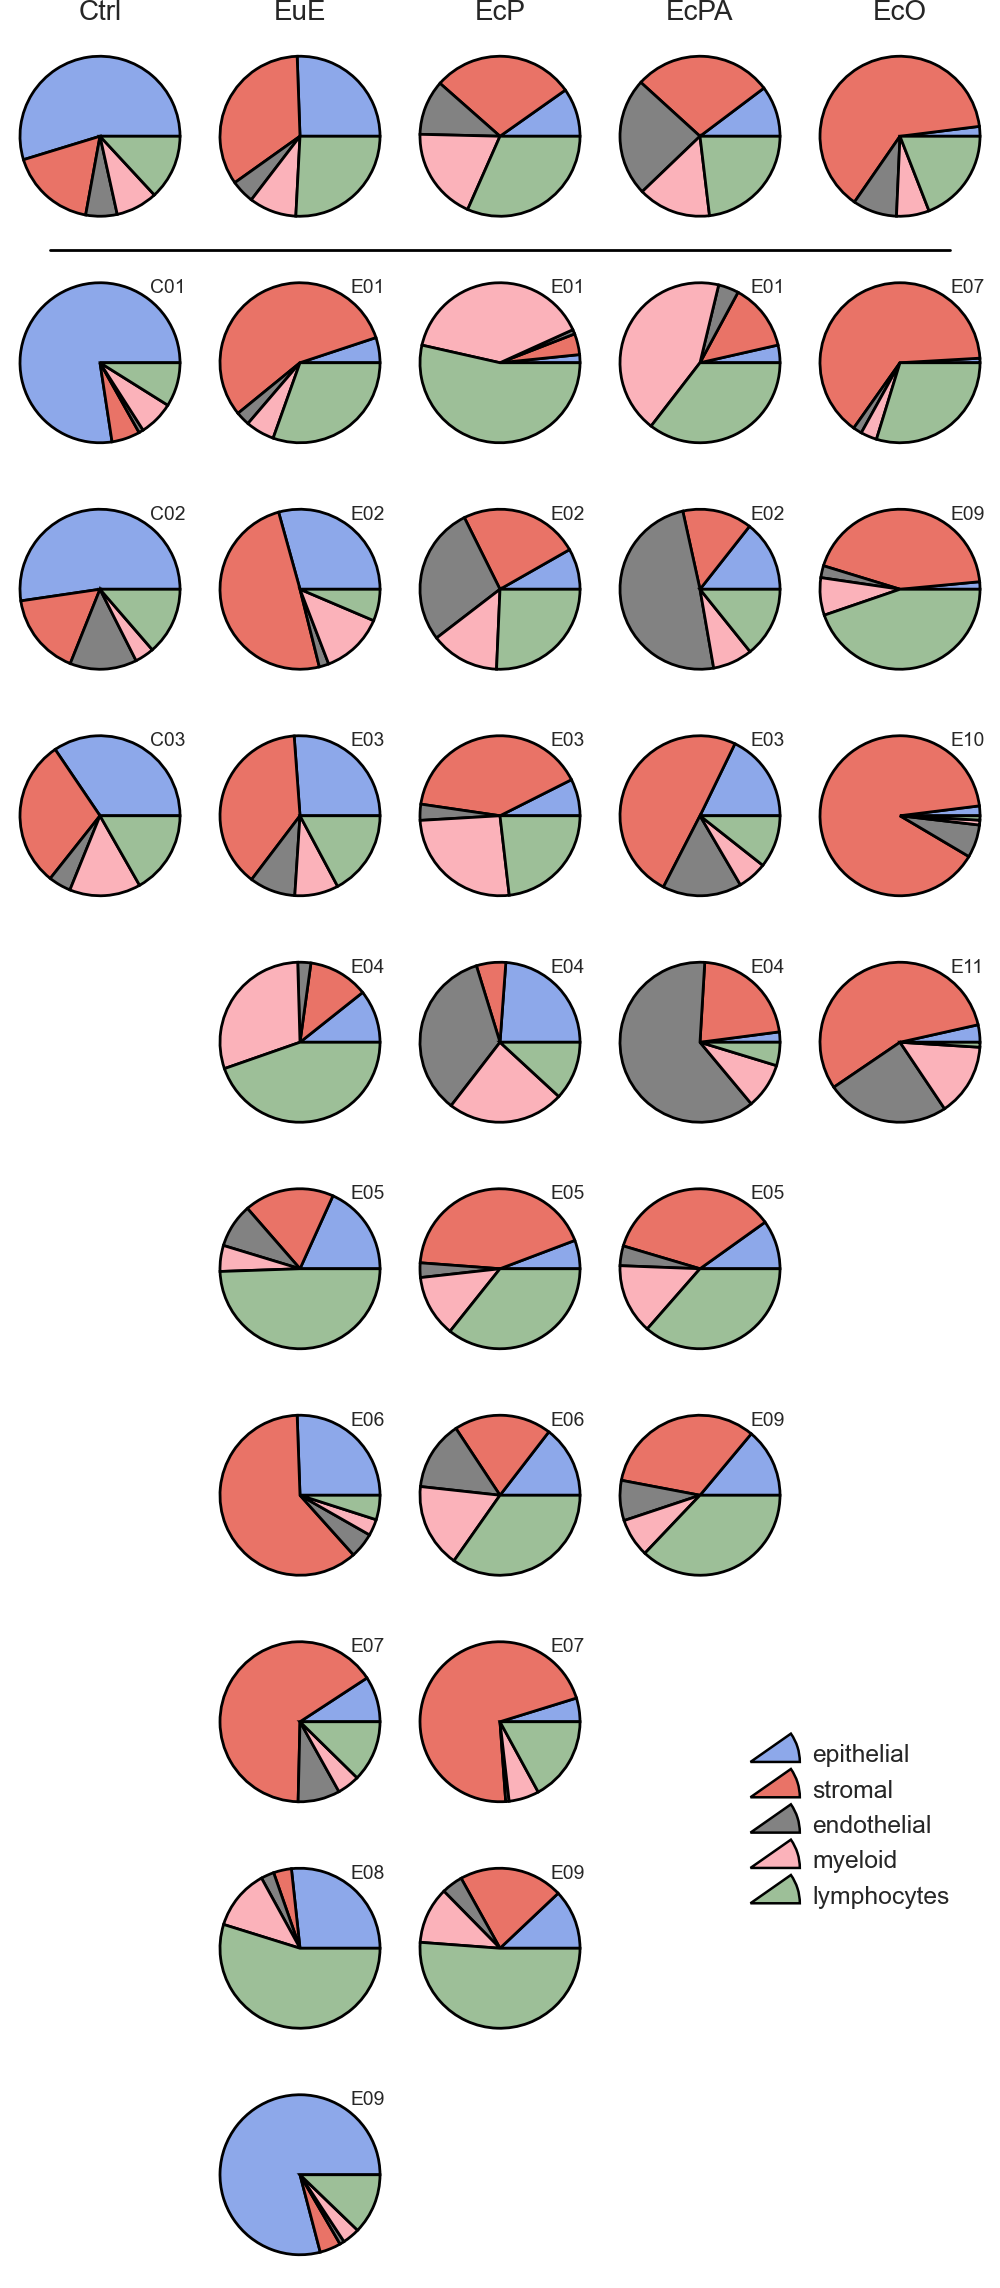

In [11]:
fig_s3x = pies(props, palette=celltype_palette)

In [12]:
fig_s3x.savefig(f"{fig_dir}/figs3x.pdf")